<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.707910,21.842741,66.836327,22.459876,-211.016401,6.830453,576.284640,-569.454188
1,0.0,1.0,73.793243,70.864103,34.418695,86.745966,942.864268,1218.686275,-195.015757,1413.702032
2,0.0,2.0,27.233141,80.282305,37.743374,94.007147,4587.406774,4836.672741,-393.449023,5230.121765
3,0.0,3.0,21.788200,94.877472,78.309881,88.246553,4042.210556,4335.432663,-238.076263,4573.508926
4,0.0,4.0,88.876865,95.132995,63.947949,73.515861,8091.099237,8422.572908,141.388647,8281.184260
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,88.277059,98.613154,32.334871,40.057416,-1137.698490,-868.415990,-1779.076846,910.660856
249996,999.0,246.0,87.801172,79.190630,59.429227,81.868158,-7081.013089,-6762.723902,-820.354872,-5942.369030
249997,999.0,247.0,33.476263,32.689420,23.309650,39.116563,359.601562,498.193458,337.936204,160.257254
249998,999.0,248.0,51.024434,51.850661,20.535307,61.610158,-3910.976319,-3715.955759,-89.579731,-3626.376028


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.707910,21.842741,66.836327,22.459876,-211.016401,6.830453,576.284640,-569.454188
1,0.0,1.0,73.793243,70.864103,34.418695,86.745966,942.864268,1218.686275,-195.015757,1413.702032
2,0.0,2.0,27.233141,80.282305,37.743374,94.007147,4587.406774,4836.672741,-393.449023,5230.121765
3,0.0,3.0,21.788200,94.877472,78.309881,88.246553,4042.210556,4335.432663,-238.076263,4573.508926
4,0.0,4.0,88.876865,95.132995,63.947949,73.515861,8091.099237,8422.572908,141.388647,8281.184260
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,88.277059,98.613154,32.334871,40.057416,-1137.698490,-868.415990,-1779.076846,910.660856
249996,999.0,246.0,87.801172,79.190630,59.429227,81.868158,-7081.013089,-6762.723902,-820.354872,-5942.369030
249997,999.0,247.0,33.476263,32.689420,23.309650,39.116563,359.601562,498.193458,337.936204,160.257254
249998,999.0,248.0,51.024434,51.850661,20.535307,61.610158,-3910.976319,-3715.955759,-89.579731,-3626.376028


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    96.707910  21.842741  66.836327  22.459876  -211.016401   
      1.0    73.793243  70.864103  34.418695  86.745966   942.864268   
      2.0    27.233141  80.282305  37.743374  94.007147  4587.406774   
      3.0    21.788200  94.877472  78.309881  88.246553  4042.210556   
      4.0    88.876865  95.132995  63.947949  73.515861  8091.099237   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.277059  98.613154  32.334871  40.057416 -1137.698490   
      246.0  87.801172  79.190630  59.429227  81.868158 -7081.013089   
      247.0  33.476263  32.689420  23.309650  39.116563   359.601562   
      248.0  51.024434  51.850661  20.535307  61.610158 -3910.976319   
      249.0  34.812729  29.306090  75.207615  28.474304  -670.212021   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0       6.830453   576.284640  -569.454188  
      1.0    1218.686275  -195.015757  1413.702032  
      2.0    4836.672741  -393.449023  5230.121765  
      3.0    4335.432663  -238.076263  4573.508926  
      4.0    8422.572908   141.388647  8281.184260  
...                  ...          ...          ...  
999.0 245.0  -868.415990 -1779.076846   910.660856  
      246.0 -6762.723902  -820.354872 -5942.369030  
      247.0   498.193458   337.936204   160.257254  
      248.0 -3715.955759   -89.579731 -3626.376028  
      249.0  -492.411283   478.814320  -971.225603  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    96.707910  21.842741  66.836327  22.459876  -211.016401   
      1.0    73.793243  70.864103  34.418695  86.745966   942.864268   
      2.0    27.233141  80.282305  37.743374  94.007147  4587.406774   
      3.0    21.788200  94.877472  78.309881  88.246553  4042.210556   
      4.0    88.876865  95.132995  63.947949  73.515861  8091.099237   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.277059  98.613154  32.334871  40.057416 -1137.698490   
      246.0  87.801172  79.190630  59.429227  81.868158 -7081.013089   
      247.0  33.476263  32.689420  23.309650  39.116563   359.601562   
      248.0  51.024434  51.850661  20.535307  61.610158 -3910.976319   
      249.0  34.812729  29.306090  75.207615  28.474304  -670.212021   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0       6.830453   576.284640  -569.454188  
      1.0    1218.686275  -195.015757  1413.702032  
      2.0    4836.672741  -393.449023  5230.121765  
      3.0    4335.432663  -238.076263  4573.508926  
      4.0    8422.572908   141.388647  8281.184260  
...                  ...          ...          ...  
999.0 245.0  -868.415990 -1779.076846   910.660856  
      246.0 -6762.723902  -820.354872 -5942.369030  
      247.0   498.193458   337.936204   160.257254  
      248.0 -3715.955759   -89.579731 -3626.376028  
      249.0  -492.411283   478.814320  -971.225603  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.707910,21.842741,66.836327,22.459876,-211.016401,6.830453,576.284640,-569.454188
1,0.0,1.0,73.793243,70.864103,34.418695,86.745966,942.864268,1218.686275,-195.015757,1413.702032
2,0.0,2.0,27.233141,80.282305,37.743374,94.007147,4587.406774,4836.672741,-393.449023,5230.121765
3,0.0,3.0,21.788200,94.877472,78.309881,88.246553,4042.210556,4335.432663,-238.076263,4573.508926
4,0.0,4.0,88.876865,95.132995,63.947949,73.515861,8091.099237,8422.572908,141.388647,8281.184260
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,88.277059,98.613154,32.334871,40.057416,-1137.698490,-868.415990,-1779.076846,910.660856
249996,999.0,246.0,87.801172,79.190630,59.429227,81.868158,-7081.013089,-6762.723902,-820.354872,-5942.369030
249997,999.0,247.0,33.476263,32.689420,23.309650,39.116563,359.601562,498.193458,337.936204,160.257254
249998,999.0,248.0,51.024434,51.850661,20.535307,61.610158,-3910.976319,-3715.955759,-89.579731,-3626.376028


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    96.707910  21.842741  66.836327  22.459876  -211.016401   
      1.0    73.793243  70.864103  34.418695  86.745966   942.864268   
      2.0    27.233141  80.282305  37.743374  94.007147  4587.406774   
      3.0    21.788200  94.877472  78.309881  88.246553  4042.210556   
      4.0    88.876865  95.132995  63.947949  73.515861  8091.099237   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.277059  98.613154  32.334871  40.057416 -1137.698490   
      246.0  87.801172  79.190630  59.429227  81.868158 -7081.013089   
      247.0  33.476263  32.689420  23.309650  39.116563   359.601562   
      248.0  51.024434  51.850661  20.535307  61.610158 -3910.976319   
      249.0  34.812729  29.306090  75.207615  28.474304  -670.212021   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0       6.830453   576.284640  -569.454188  
      1.0    1218.686275  -195.015757  1413.702032  
      2.0    4836.672741  -393.449023  5230.121765  
      3.0    4335.432663  -238.076263  4573.508926  
      4.0    8422.572908   141.388647  8281.184260  
...                  ...          ...          ...  
999.0 245.0  -868.415990 -1779.076846   910.660856  
      246.0 -6762.723902  -820.354872 -5942.369030  
      247.0   498.193458   337.936204   160.257254  
      248.0 -3715.955759   -89.579731 -3626.376028  
      249.0  -492.411283   478.814320  -971.225603  

[250000 rows x 8 columns]

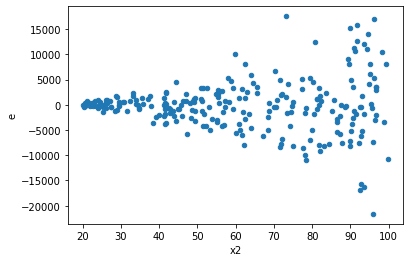

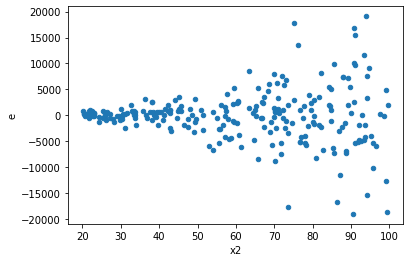

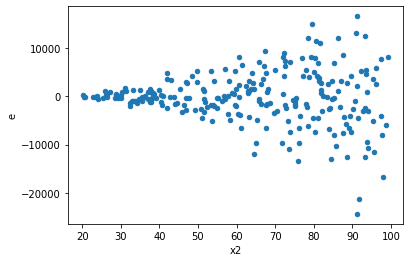

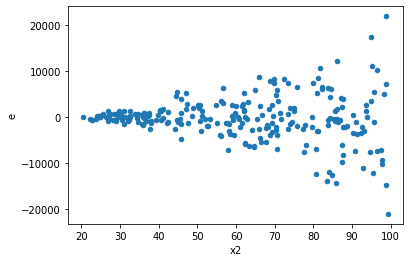

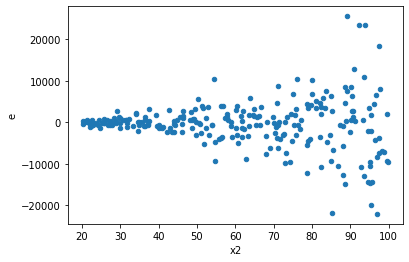

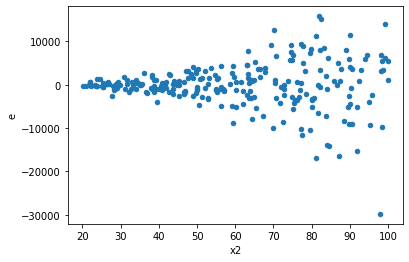

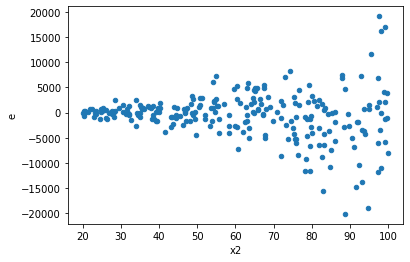

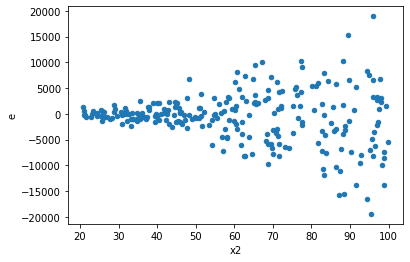

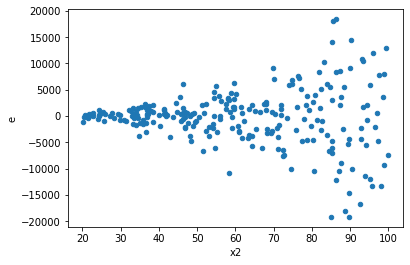

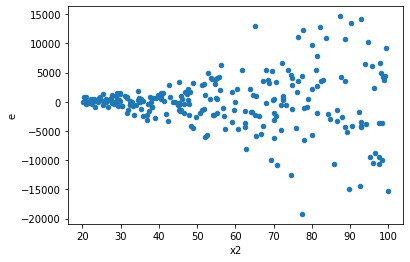

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,238833980.9217524,5408522880.851643,2487853.967934921,56338780.00887128,22.64553335324424,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,152738719.46802044,5173558310.651074,1591028.3277918797,53891232.40261536,33.87195027344906,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,382731318.10230297,5636888293.7081375,3986784.563565656,58717586.3927931,14.728056020232485,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,224680770.04719397,4808406216.681071,2340424.6879916037,50087564.757094495,21.401058113122325,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,249362541.856616,7220118463.972998,2597526.477673083,75209567.33305205,28.95430247949823,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,243891219.09244433,5828028349.230752,2540533.532212962,60708628.63782033,23.89601548968313,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,178587983.4095064,4189043125.1897674,1860291.493849025,43635865.88739341,23.45646692019694,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,172261031.4818761,4769652710.313327,1794385.744602876,49683882.39909715,27.688518228890036,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,267671644.86831802,5587851693.10208,2788246.300711646,58206788.46981334,20.875769997419948,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,238833980.9217524,5408522880.851643,2487853.967934921,56338780.00887128,22.64553335324424,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,152738719.46802044,5173558310.651074,1591028.3277918797,53891232.40261536,33.87195027344906,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,382731318.10230297,5636888293.7081375,3986784.563565656,58717586.3927931,14.728056020232485,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,224680770.04719397,4808406216.681071,2340424.6879916037,50087564.757094495,21.401058113122325,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,249362541.856616,7220118463.972998,2597526.477673083,75209567.33305205,28.95430247949823,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,243891219.09244433,5828028349.230752,2540533.532212962,60708628.63782033,23.89601548968313,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,178587983.4095064,4189043125.1897674,1860291.493849025,43635865.88739341,23.45646692019694,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,172261031.4818761,4769652710.313327,1794385.744602876,49683882.39909715,27.688518228890036,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,267671644.86831802,5587851693.10208,2788246.300711646,58206788.46981334,20.875769997419948,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64